In [8]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import Polygon

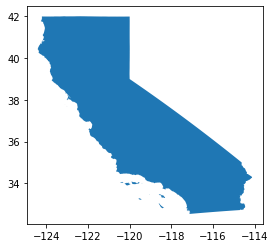

In [58]:
california = gpd.read_file('ark28722-s7059k-shapefile/s7059k.shp')

%matplotlib inline
california.plot()

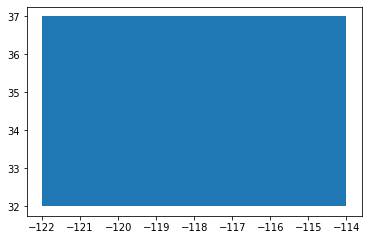

In [13]:
poly = Polygon([(-122.0, 32.0), (-114.0, 32.0), (-114.0, 37.0), (-122.0, 37.0)])

eq_data = gpd.GeoDataFrame(geometry=[poly])

%matplotlib inline
eq_data.plot()

In [12]:
data_shp_all = gpd.read_file('Qfaults_2018_shapefile/Qfaults_2018_shapefile.shp')
data_shp_all_historic = data_shp_all[data_shp_all['age'] == 'historic']

In [14]:
faults_w_eq = data_shp_all[data_shp_all['earthquake'].notnull()]
faults_w_eq.index.name = 'Index'
faults_w_eq_historic = faults_w_eq[faults_w_eq['age'] == 'historic']

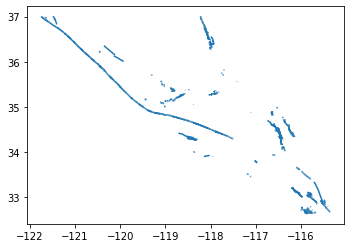

In [59]:
faults_and_eq_ = gpd.sjoin(data_shp_all_historic, eq_data , how="inner", op='intersects')
faults_and_eq = faults_and_eq_.drop(columns=['index_right'])

%matplotlib inline
faults_and_eq.plot()

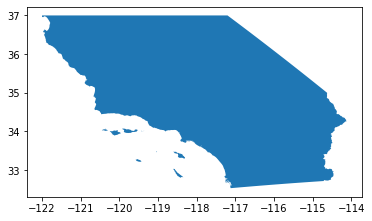

In [22]:
california_and_eq = gpd.overlay(california, eq_data, how='intersection')

%matplotlib inline
california_and_eq.plot()

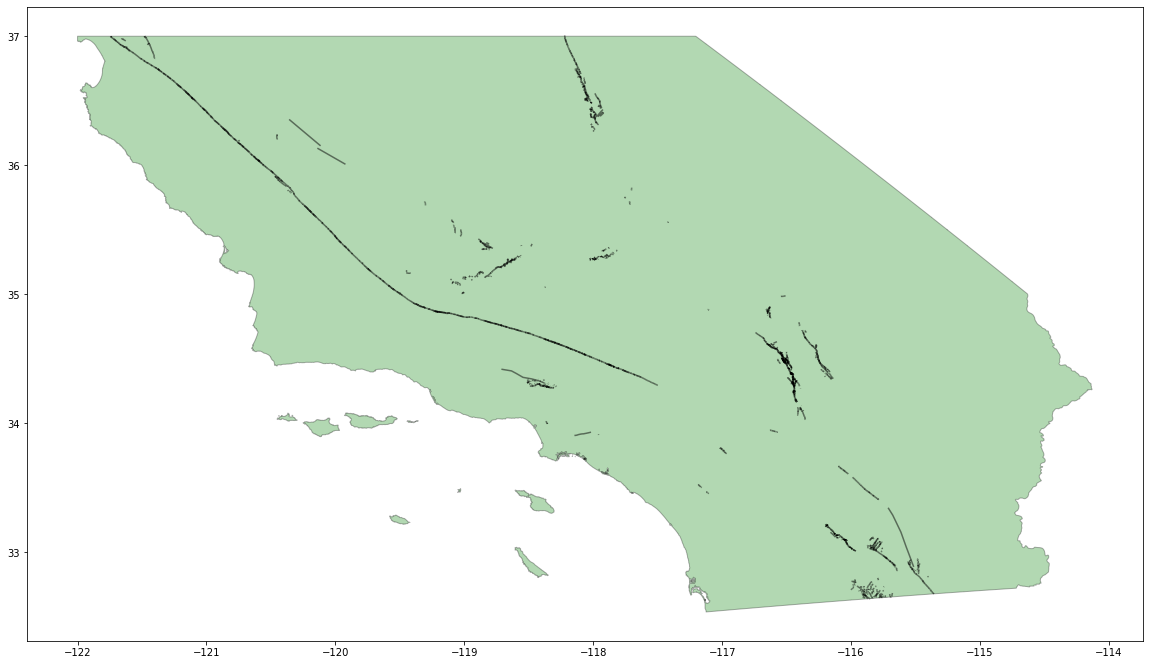

In [61]:
%matplotlib inline

ax = california_and_eq.plot(figsize=(20,20), alpha=0.3, color='g', edgecolor='k')
faults_and_eq.plot(ax=ax, alpha=0.5, color='k')

## Fault Areas

In [ ]:
data_areas = gpd.read_file('Qfaults_2018_shapefile/qfault_areas.shp')
data_areas

In [ ]:
data_areas.loc[3, 'geometry']

In [ ]:
lat_point_list = [42.032974332441, 41.967659203678, 38.993572058209, 34.307143856288, 33.943359946579, 33.724339661748, 33.541394668983, 33.321348526699, 33.063924198121, 32.953368145799, 32.805744732907, 32.657875736955, 32.583849325657, 33.321348526699, 33.797408767572, 34.052659421376, 34.052659421376, 34.379712580462, 34.452218472827, 34.452218472827, 34.777715803605, 35.281500657891, 35.675147436085, 36.385912772877, 36.633162095587, 36.949891786813, 37.230328387604, 37.544577320856, 37.857507156252, 37.961523313966, 38.376115424036, 38.856820134744, 39.707186656827, 40.178873314347, 40.413496049702, 40.81380923057, 41.376808565702]
lon_point_list = [-124.3212890625, -120.0146484375, -119.970703125, -114.08203125, -114.4775390625, -114.3896484375, -114.609375, -114.78515625, -114.78515625, -114.3896484375, -114.5654296875, -114.9609375, -116.982421875, -117.333984375, -118.037109375, -118.30078125, -119.1357421875, -119.3994140625, -119.970703125, -120.5859375, -120.673828125, -120.849609375, -121.1572265625, -121.9921875, -121.8603515625, -121.81640625, -122.34375, -122.431640625, -122.607421875, -122.958984375, -123.046875, -123.7060546875, -123.92578125, -124.2333984375, -124.453125, -124.189453125, -124.189453125]

polygon_geom = Polygon(zip(lon_point_list, lat_point_list))
crs = {'init': 'epsg:4326'}
polygon = gpd.GeoDataFrame(index=[0], crs=crs, geometry=[polygon_geom])       
print(polygon.geometry)

polygon.to_file(filename='polygon.geojson', driver='GeoJSON')
polygon.to_file(filename='polygon.shp', driver="ESRI Shapefile")

In [ ]:
%matplotlib inline
faults_w_eq.plot()
plt.xlim([-125,-110])
plt.ylim([30,47])

POLYGON ((-124.3212890625 42.032974332441, -120.0146484375 41.967659203678, -119.970703125 38.993572058209, -114.08203125 34.307143856288, -114.4775390625 33.943359946579, -114.3896484375 33.724339661748, -114.609375 33.541394668983, -114.78515625 33.321348526699, -114.78515625 33.063924198121, -114.3896484375 32.953368145799, -114.5654296875 32.805744732907, -114.9609375 32.657875736955, -116.982421875 32.583849325657, -117.333984375 33.321348526699, -118.037109375 33.797408767572, -118.30078125 34.052659421376, -119.1357421875 34.052659421376, -119.3994140625 34.379712580462, -119.970703125 34.452218472827, -120.5859375 34.452218472827, -120.673828125 34.777715803605, -120.849609375 35.281500657891, -121.1572265625 35.675147436085, -121.9921875 36.385912772877, -121.8603515625 36.633162095587, -121.81640625 36.949891786813, -122.34375 37.230328387604, -122.431640625 37.544577320856, -122.607421875 37.857507156252, -122.958984375 37.961523313966, -123.046875 38.376115424036, -123.7060546875 38.856820134744, -123.92578125 39.707186656827, -124.2333984375 40.178873314347, -124.453125 40.413496049702, -124.189453125 40.81380923057, -124.189453125 41.376808565702))

## California

In [ ]:
# data_csv = pd.read_csv('Qfaults_2018_shapefile/Qfaults_2018_shapefile.csv')
# print(data_csv.columns)
# len(data_csv.columns)

In [ ]:
# data_gdb = gpd.read_file('QFaults_2018.gdb')
# print(data_gdb.columns))
# len(data_shp_all.columns)

In [ ]:
# %matplotlib inline
# data_shp.plot()

## Fault Lines

In [ ]:
san_andreas = faults_w_eq[faults_w_eq['fault'] == 'San Andreas fault zone']
san_andreas.index.name = 'Index'
print(len(san_andreas))
san_andreas.to_csv('san_andreas_faults_eq_USGS.csv')
faults_w_eq.to_csv('southern_cal_faults_eq_USGS.csv')
# san_andreas

In [ ]:
%matplotlib inline
data_shp_all_historic.plot(color='red')
plt.xlim([-122,-114])
plt.ylim([33,37])

In [ ]:
info = pd.read_csv('Qfaults_2018_shapefile/section_info.csv', encoding = "ISO-8859-1")
references = pd.read_csv('Qfaults_2018_shapefile/references.csv', encoding = "ISO-8859-1")

In [ ]:
info

In [ ]:
info[info['earthquake'].notnull()]

In [ ]:
references

In [ ]:
san_andreas_historic = san_andreas[san_andreas['age'] == 'historic']
san_andreas_historic.index.name = 'Index'
len(san_andreas_historic)
san_andreas_historic.to_csv('san_andreas_faults_historic_eq_USGS.csv')

In [ ]:
# faults_w_eq_historic.index.name = 'Index'
# len(san_andreas_historic)
# san_andreas_historic.to_csv('san_andreas_faults_historic_eq_USGS.csv')

In [ ]:
%matplotlib inline
# data_shp.plot()
# faults_w_eq.plot()
plt.plot(data_shp_all['geometry'], data_gdb['geometry'])
plt.xlim([-125,-110])
plt.ylim([30,47])

In [ ]:
data_gdb = gpd.read_file('QFaults_2018.gdb')
data_shp = gpd.read_file('Qfaults_2018_shapefile/Qfaults_2018_shapefile.shp')
data_fauls_shp = gdp.read_file('Qfaults_2018_shapefile/qfault_areas.shp')
data_fauls_sbn = gdp.read_file('Qfaults_2018_shapefile/qfault_areas.sbn')

In [ ]:
data_fauls_shp = gpd.read_file('Qfaults_2018_shapefile/qfault_areas.shp')
data_fauls_sbn = gpd.read_file('Qfaults_2018_shapefile/qfault_areas.sbn')

In [ ]:
data_fauls_shp

In [ ]:
# Let's create a bounding box of the world and make a whole in it

# First we define our exterior
world_exterior = [(-170, 80), (-170, -80), (170, -80), (170, 80)]

# Let's create a single big hole where we leave ten decimal degrees at the boundaries of the world
# Notice: there could be multiple holes, thus we need to provide a list of holes
hole = [[(-180, 90), (-180, -90), (180, -90), (180, 90)]]

# World without a hole
world = Polygon(shell=world_exterior)

# Now we can construct our Polygon with the hole inside
world_has_a_hole = Polygon(shell=world_exterior, holes=hole)

crs = {'init': 'epsg:4326'}

World = gpd.GeoDataFrame(index=[0], geometry=[world])
World_w_hole = gpd.GeoDataFrame(index=[0], geometry=[world_has_a_hole])

%matplotlib inline
World.plot()
World_w_hole.plot()

In [ ]:
print('world_has_a_hole:', world_has_a_hole)

In [ ]:
references